In [0]:
!pip install cvxpy

In [0]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import cvxpy as cvx
import scipy.io.wavfile as siw

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

Saving dcelor.wav to dcelor.wav
User uploaded file "dcelor.wav" with length 12264 bytes


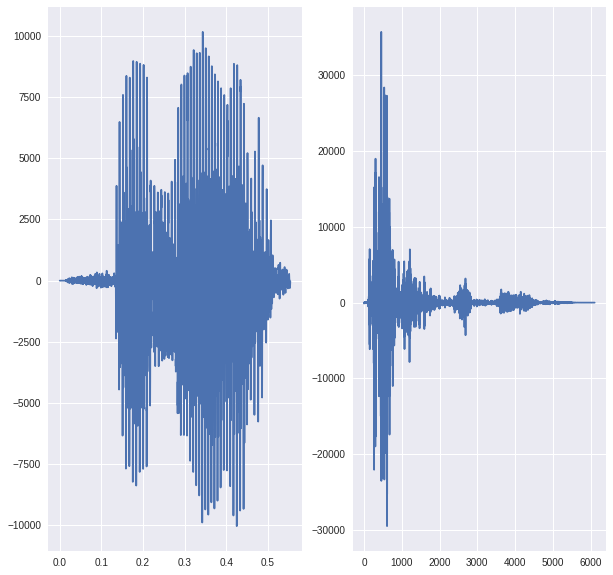

In [0]:
rate, y = siw.read('dcelor.wav')
n = len(y)
t = np.linspace(0, n/rate, n)
yt = spfft.dct(y, norm='ortho')
plt.subplot(121)
plt.rcParams['figure.figsize']=(40,10)
#plt.xlim(0,0.008)
plt.plot(t,y)
plt.subplot(122)
plt.plot(yt)
#plt.xlim(0,600)

In [0]:
# extract small sample of signal
m = int(n*(4/10)) # 40% sample
Sen= np.zeros((m,n))
SenSize=Sen.shape
ri = np.random.binomial(1,0.5,SenSize)
#ri.sort() # sorting not strictly necessary, but convenient for plotting
#t2 = t[ri]
y2 = np.dot(ri,y)


In [0]:
# create idct matrix operator
A = spfft.idct(np.identity(n), norm='ortho', axis=0)
A1 = np.dot(ri,A)
# do L1 optimization
vx = cvx.Variable(n)
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [A1*vx == y2]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)

-----------------------------------------------------------------
           OSQP v0.5.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2018
-----------------------------------------------------------------
problem:  variables n = 12220, constraints m = 14664
          nnz(P) + nnz(A) = 14957280
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on

iter   objective    pri res    dua res    rho        time
   1  -4.8880e+04   3.64e+05   1.00e+09   1.00e-01   7.51e+01s
 200   1.0534e+07   8.05e+00   1.12e+00   1.00e-01   9.46e+01s
 400   7.0586e+06   8.77e+00   2.03e+00   1.00e-01   1

(0.1, 0.3)

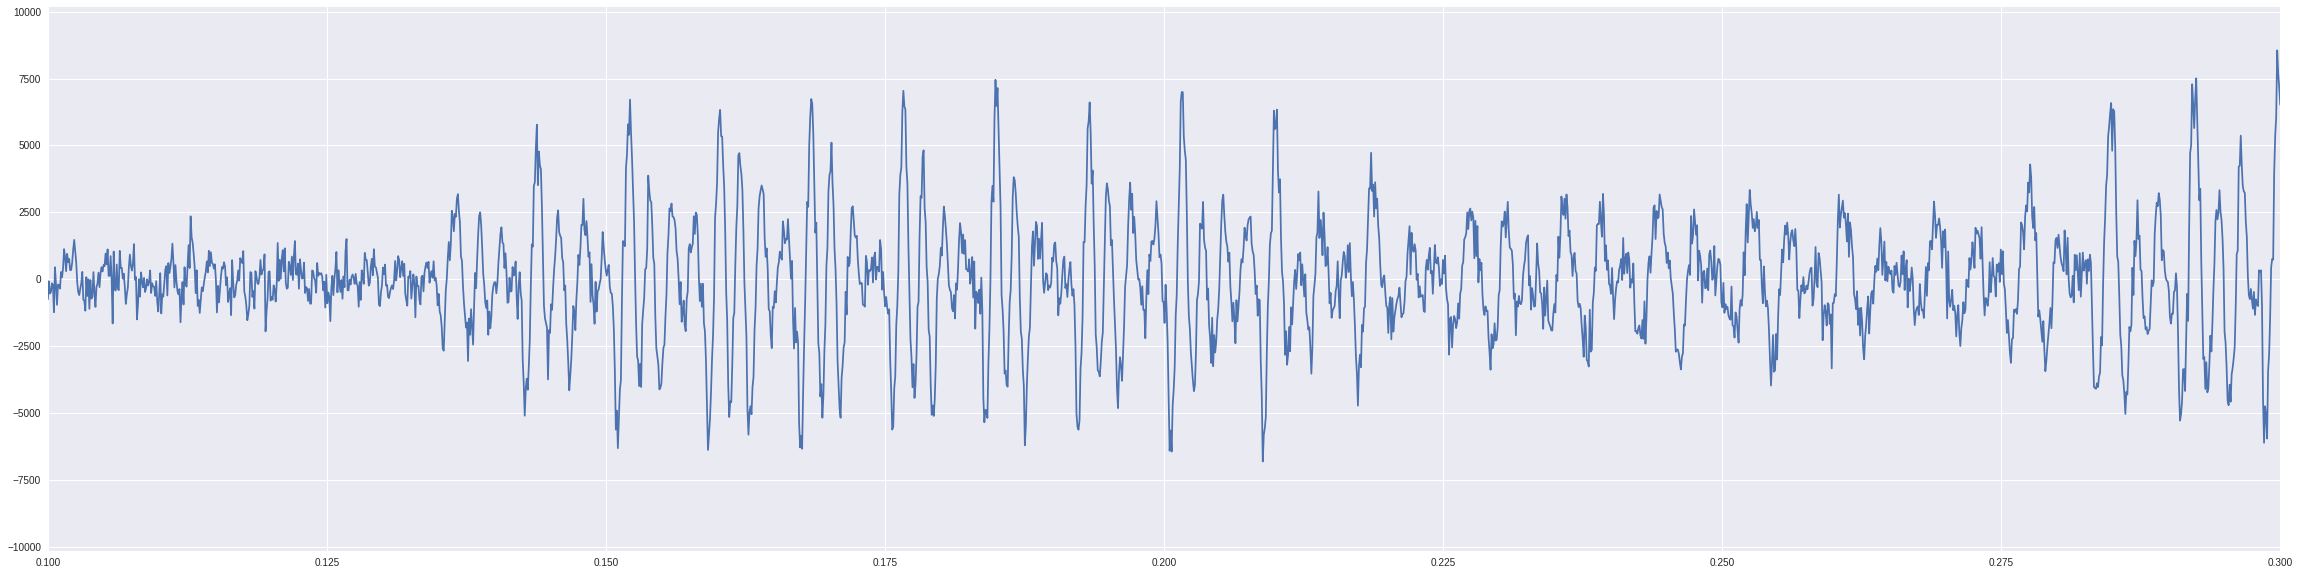

In [0]:
# reconstruct signal
x = np.array(vx.value)
x = np.squeeze(x)
sig = spfft.idct(x, norm='ortho', axis=0)
plt.plot(t,sig)
plt.rcParams['figure.figsize']=(10,10)
plt.xlim(0.1,0.3)

In [0]:
from IPython.display import Audio
Audio(data=sig, rate=rate)